# ADS Homework #2
Monday 2-5pm Session, Proffessor Tim Savage

Please submit this assignment to the NYU Classes 'Assignments' section by 12:00pm on Monday, October 8, strictly labeling the assignments with the format **'ADS_HW1_(your net ID).ipynb'**. Be sure not to confuse Net ID (e.g. 'acs882') with N-number ('N166...'). This homework is here for you to better understand and practice the material; while you may discuss approaches to problems with your classmates (in fact, this is encouraged!), please ensure that all final code submitted is your own. You may reach out to the TA, Alex Shannon, at acs882@nyu.edu at anytime (he hangs out at CUSP a lot, so feel free to say hello). Additionally, Professor Savage will hold office hours on Mondays from 9am-12am; a location for this will be confirmed and communicated shortly.

### Problem 1 - PM2.5 Concentration in Beijing (50 points)

**What is a PM2.5?**<br>
“Particulate matter” (PM) is the general term used for a mixture of solid particles and liquid droplets
found in the air. The '2.5' specifies particles with aerodynamic diameters less than or equal to 2.5 microns (μm). This is very small - to put in in perspective, it would take about 30 of these, lined up next to each other, to cover the width of a human hair. They result from a variety of activities, including power plants, motor vehicles, airplanes, residential wood burning, forest fires, agricultural burning, volcanic eruptions (hopefully not something to worry about in NYC) and dust storms.<br>
**Why is this important to cities?**<br>
An extensive body of scientific evidence shows that short- or long-term exposures to fine particles
can cause adverse cardiovascular effects, including heart attacks and strokes resulting in
hospitalizations and, in some cases, premature death. A number of studies have also linked fine
particle exposures to respiratory effects, including the exacerbation of asthma and other respiratory
illnesses (short-term exposures) and the impairment of lung development (long-term exposures). In short, PM2.5 poses public health risks, and is something which cities should be knowledgeable about; predicting when PM2.5 concentration will be particularly high could allow the city to issue warnings or place restrictions on certain activities (e.g. driving, industrial activity, etc.).<br>
**The Data**<br>
We will be looking specifically at Beijing from 2010-2014, using a variety of weather-related variables. Although there exists a time component, and other data sources could be merged to look for additional factors (this could be a great final project - think traffic data, air-taffic data, industrial activity, etc), we will specifically focused on weather for the purposes of this assignment. Please load and take a look at the data below. 

In [4]:
# load libraries; read in data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
%matplotlib inline

beijing_pm = pd.read_csv('Beijing_PM2.5.csv')
beijing_pm.head(3)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0


#### Description of Data

The data can be found, along with descriptions, at the following source: http://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

**Attribute Information:**<br>
**No:** row number <br>
**year:** year of data in this row <br>
**month:** month of data in this row <br>
**day:** day of data in this row <br>
**hour:** hour of data in this row <br>
**pm2.5:** PM2.5 concentration (ug/m^3) <br>
**DEWP:** Dew Point (â„ƒ) <br>
**TEMP:** Temperature (â„ƒ) <br>
**PRES:** Pressure (hPa) <br>
**cbwd:** Combined wind direction <br>
**Iws:** Cumulated wind speed (m/s) <br>
**Is:** Cumulated hours of snow <br>
**Ir:** Cumulated hours of rain <br>

**1.1)** Data cleaning: As you can see, there are some *n/a* values in our dataframe that need to be removed. Do so, and while you're at it, remove any columns specifying date or time and the wind direction column, as we will not be using these in our analysis. Additionally, decimals should not be used in column names, as this can create problems further down the road - rename 'PM2.5' to simply 'PM25'. (The data are also messy in that the 'I' (i) in the last three columns is indistiguishable from a lower-case 'l' (L) in python's font. Please feel free to rename these to your choosing, however this is not required.) Show the first 5 rows of the cleaned dataset below, then print a descriptive table of the dataset (mean, stdev, etc). **(5 points)**

In [14]:
#remove n/a
beijing_pm = beijing_pm.dropna(axis=0)
#select columns
beijing_pm=beijing_pm[['pm2.5','DEWP','TEMP','PRES','Iws','Is','Ir']]
#rename columns
beijing_pm=beijing_pm.rename(columns={'pm2.5':'PM25','Iws':'IWS','Is':'IS','Ir':'IR'})

In [15]:
beijing_pm.head(5)

,PM25,DEWP,TEMP,PRES,IWS,IS,IR
24,129.0,-16,-4.0,1020.0,1.79,0,0
25,148.0,-15,-4.0,1020.0,2.68,0,0
26,159.0,-11,-5.0,1021.0,3.57,0,0
27,181.0,-7,-5.0,1022.0,5.36,1,0
28,138.0,-7,-5.0,1022.0,6.25,2,0


In [16]:
print(beijing_pm.describe())

               PM25          DEWP          TEMP          PRES           IWS  \
count  41757.000000  41757.000000  41757.000000  41757.000000  41757.000000   
mean      98.613215      1.750174     12.401561   1016.442896     23.866747   
std       92.050387     14.433658     12.175215     10.300733     49.617495   
min        0.000000    -40.000000    -19.000000    991.000000      0.450000   
25%       29.000000    -10.000000      2.000000   1008.000000      1.790000   
50%       72.000000      2.000000     14.000000   1016.000000      5.370000   
75%      137.000000     15.000000     23.000000   1025.000000     21.910000   
max      994.000000     28.000000     42.000000   1046.000000    565.490000   

                 IS            IR  
count  41757.000000  41757.000000  
mean       0.055344      0.194866  
std        0.778875      1.418165  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  


**1.2)** Take an initial look at the correlations among the variables to get a better intuition for the data. Plot the correlations in a heatmap table using the Seaborn library with the 'seismic' colormap (this provides for clearer visualization, and lets important values "jump out" at you more immediately - it is also comes across as less-scary when showing to non-data scientists). Try to adjust the figure-size so that it is not too compressed. Please include a brief summary of your observations.  **(5 points)**

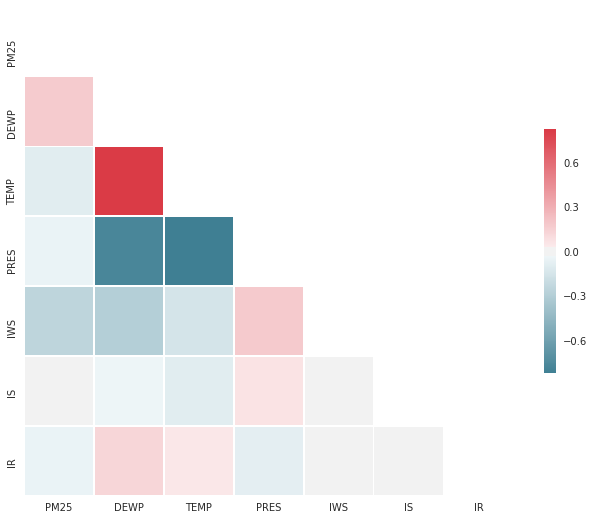

In [17]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = beijing_pm.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Summary:**

**1.3)** Using the independant variable with the strongest correlation (note: 'strong' is defined by absolute value) to PM2.5 concentration, run a single variable regression. Print the results, and write a brief interpretation of the R-squared. **(10 points)**

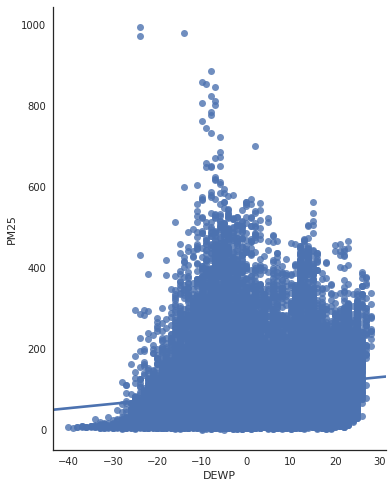

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.pairplot(beijing_pm, x_vars=['DEWP'], y_vars='PM25', size=7, aspect=0.8,kind = 'reg')
plt.show()

In [19]:
from scipy import stats
x=beijing_pm.DEWP
y=beijing_pm.PM25
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print "r-squared for DEWP:", r_value**2

r-squared for DEWP: 0.0293859381518


Summary:The rsquared value is 0.0293859381518, which is low. To make a better regression model, we should use more than one variable.

**1.4)** Now fit the regression with all of the independant variables. How does the R_squared change? What does this mean? How might colinearity impact our model? **(12 points)**

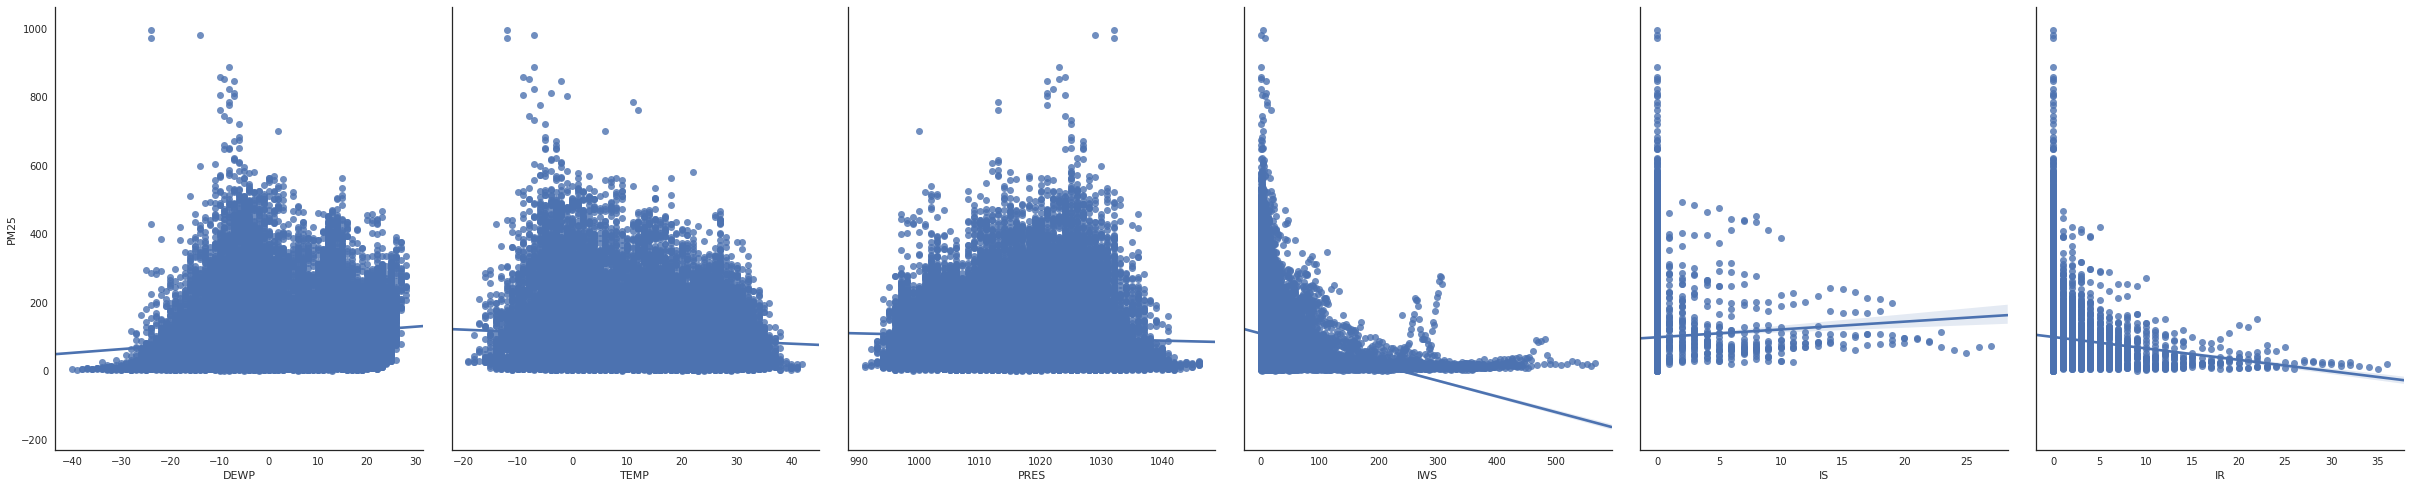

In [20]:
sns.pairplot(beijing_pm, x_vars=['DEWP','TEMP','PRES','IWS','IS','IR'], y_vars='PM25', size=7, aspect=0.8,kind = 'reg')
plt.show()

In [21]:
from scipy import stats
x1=beijing_pm.DEWP
y=beijing_pm.PM25
slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y)
print "r-squared for DEWP:", r_value**2

x2=beijing_pm.TEMP
slope, intercept, r_value, p_value, std_err = stats.linregress(x2,y)
print "r-squared for TEMP:", r_value**2

x3=beijing_pm.PRES
slope, intercept, r_value, p_value, std_err = stats.linregress(x3,y)
print "r-squared for PRES:", r_value**2

x4=beijing_pm.IWS
slope, intercept, r_value, p_value, std_err = stats.linregress(x4,y)
print "r-squared for IWS:", r_value**2

x5=beijing_pm.IS
slope, intercept, r_value, p_value, std_err = stats.linregress(x5,y)
print "r-squared for IS:", r_value**2

x6=beijing_pm.IR
slope, intercept, r_value, p_value, std_err = stats.linregress(x6,y)
print "r-squared for IR:", r_value**2

r-squared for DEWP: 0.0293859381518
r-squared for TEMP: 0.00819640559649
r-squared for PRES: 0.00223561665809
r-squared for IWS: 0.061397133248
r-squared for IS: 0.000371162420596
r-squared for IR: 0.00263874390899


In [22]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(beijing_pm.ix[:,-6:],beijing_pm.PM25,train_size=.80)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
 
model.fit(X_train,Y_train)
 
a  = model.intercept_
 
b = model.coef_
 
print("a",a,",b",b)

('a', 1748.7346946409716, ',b', array([ 4.26151132, -6.07508972, -1.54904295, -0.26230176, -2.05630351,
       -7.15263096]))


In [24]:
score=model.score(X_test,Y_test)
 
print(score)

0.234857908032


Summary:collinearity reduces the effective amount of information available to assess the unique effects of a predictor.

**1.5)** Run another regression on the data, this time removing the "DEWP" and "PRES" independant variables. What happens to the coefficients for the remaining variables? Why might this be the case? (Hint: look at your correlation table above) **(12 points)**

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(beijing_pm.ix[:,[2,4,5,6]],beijing_pm.PM25,train_size=.80)
model = LinearRegression() 
model.fit(X_train,Y_train)
 
a  = model.intercept_
 
b = model.coef_
 
print("a",a,",b",b)

('a', 122.41420710615897, ',b', array([-0.93756986, -0.49094353,  1.85071965, -3.12758033]))


Summary:because dewp and pres are related to other variables, so when we drop them the coefficients of other variables change.

**1.6)** Calculate (either in python or by hand) the impact of a one standard deviation increase in *temperature* and a one standard deviation increase in *cumulative wind speed* for the models in **1.4** & **1.5**. **(6 points)**

In [26]:
beijing_pm.ix[:,[2]]+=beijing_pm.ix[:,[2]].std()
beijing_pm.ix[:,[4]]+=beijing_pm.ix[:,[4]].std()

In [27]:
#model in 1.4
X_train,X_test,Y_train,Y_test = train_test_split(beijing_pm.ix[:,-6:],beijing_pm.PM25,train_size=.80)
model = LinearRegression()
 
model.fit(X_train,Y_train)
 
a  = model.intercept_
 
b = model.coef_
 
print("a",a,",b",b)

('a', 1809.3404145521145, ',b', array([ 4.28344795, -6.0893132 , -1.52241116, -0.26334947, -2.25655086,
       -7.29838928]))


In [28]:
#model in 1.5
X_train,X_test,Y_train,Y_test = train_test_split(beijing_pm.ix[:,[2,4,5,6]],beijing_pm.PM25,train_size=.80)
model = LinearRegression()
 
model.fit(X_train,Y_train)
 
a  = model.intercept_
 
b = model.coef_
 
print("a",a,",b",b)

('a', 159.51851924166087, ',b', array([-0.96268898, -0.49960926,  1.38797725, -3.13623963]))


Answers:above I have listed the changes in coefficients.

### Problem 2 - Polynomial Regression (30 points)

In [29]:

y  = [2.61338821976, 2.17035124741, 0.0495462311938, 1.15825768821, 1.39756687454, 1.77323953196]
x1 = [-0.5, -0.32, -0.14, 0.04, 0.22, 0.4]
df = pd.DataFrame(data=[y, x1], index=(['y', 'x1'])).T
df.head()

,y,x1
0,2.613388,-0.50
1,2.170351,-0.32
2,0.049546,-0.14
3,1.158258,0.04
4,1.397567,0.22


**2.1)** Draw a scatter plot of the data (no lines required). Does there seem to be an apparent line of best fit? **(5 points)**

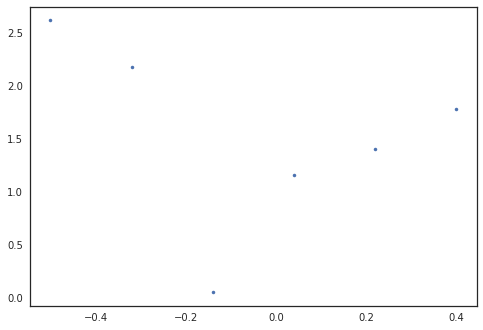

In [30]:
plt.plot(x1,y,'.')
#maybe a curved line would fit

**Summary:**

**2.2)** Our dependant variable *y*, in this case, does not appear to be a linear function of *x*. Create new columns in the dataframe for $x^2$, $x^3$, and $x^4$. **(5 points)**

In [31]:
df['x2']=df.x1*df.x1
df['x3']=df.x1*df.x1*df.x1
df['x4']=df.x1*df.x1*df.x1*df.x1
df.head()

,y,x1,x2,x3,x4
0,2.613388,-0.50,0.2500,-0.125000,0.062500
1,2.170351,-0.32,0.1024,-0.032768,0.010486
2,0.049546,-0.14,0.0196,-0.002744,0.000384
3,1.158258,0.04,0.0016,0.000064,0.000003
4,1.397567,0.22,0.0484,0.010648,0.002343


In [32]:
x=np.array(x1)
y=np.array(y)

**2.3)** For each of our polynomials (*x1, x2, x3, x4*), fit a model to *y*. Store and report the R-squared and parameters for each polynomial. Plot the R-squared values in a bar chart to see how they change with the polynomials. Which polynomial seems to be the best fit? Describe why this might be the case. **(10 points)**

In [33]:
#x1
from statsmodels.formula.api import ols 
model = ols("y ~ x1", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                 -0.119
Method:                 Least Squares   F-statistic:                    0.4683
Date:                Sun, 07 Oct 2018   Prob (F-statistic):              0.531
Time:                        22:10:08   Log-Likelihood:                -6.9579
No. Observations:                   6   AIC:                             17.92
Df Residuals:                       4   BIC:                             17.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.4841      0.391      3.797      0.0

In [34]:
#x2
model = ols("y ~ x2", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     7.418
Date:                Sun, 07 Oct 2018   Prob (F-statistic):             0.0528
Time:                        22:10:08   Log-Likelihood:                -4.1433
No. Observations:                   6   AIC:                             12.29
Df Residuals:                       4   BIC:                             11.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.7897      0.363      2.177      0.0

In [35]:
#x3
model = ols("y ~ x3", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1.291
Date:                Sun, 07 Oct 2018   Prob (F-statistic):              0.319
Time:                        22:10:09   Log-Likelihood:                -6.4508
No. Observations:                   6   AIC:                             16.90
Df Residuals:                       4   BIC:                             16.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.4265      0.365      3.904      0.0

In [36]:
#x4
model = ols("y ~ x4", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     4.727
Date:                Sun, 07 Oct 2018   Prob (F-statistic):             0.0954
Time:                        22:10:10   Log-Likelihood:                -4.9497
No. Observations:                   6   AIC:                             13.90
Df Residuals:                       4   BIC:                             13.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0713      0.347      3.090      0.0

In [38]:
df.loc['r squared'] = [np.nan,0.105,0.650,0.244,0.542]
df

,y,x1,x2,x3,x4
0,2.613388,-0.500,0.2500,-0.125000,0.062500
1,2.170351,-0.320,0.1024,-0.032768,0.010486
2,0.049546,-0.140,0.0196,-0.002744,0.000384
3,1.158258,0.040,0.0016,0.000064,0.000003
4,1.397567,0.220,0.0484,0.010648,0.002343
5,1.773240,0.400,0.1600,0.064000,0.025600
r squared,NaN,0.105,0.6500,0.244000,0.542000


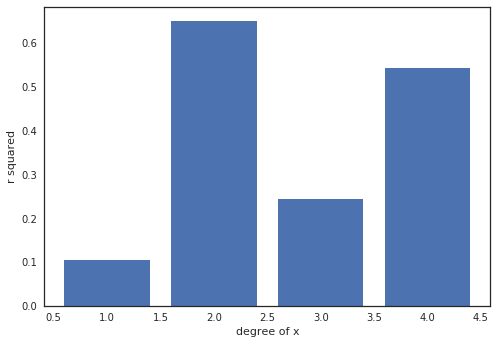

In [39]:
plt.bar((1,2,3,4),(0.105,0.650,0.244,0.542) );
plt.xlabel("degree of x")
plt.ylabel("r squared")
plt.show()

we should choose x2 because the rsquared value is the largest among the four

**2.4)** Plot a figure with 4 subfigures, one for each polynomial degree. In each subfigure:<br>
a) Draw the original scatter plot<br>
b) Plot the curve of the true function $f(x) = 9x^2 - x + 1$ (use np.linspace to create a line)<br>
c) Plot your fitted curve for each degree. Observe how our model fits the data as the degree changes.<br>
d) Having done this exercise, why might adding polynomials to our data be useful? What conclusions can we draw from fitting the four polynomials? **(10 points)**

        4         3         2
-77.43 x - 20.61 x + 22.55 x + 2.35 x + 0.4697
        3         2
-5.122 x + 6.691 x + 0.6868 x + 0.8391
       2
7.459 x - 0.1129 x + 0.7979
 
-0.8588 x + 1.484


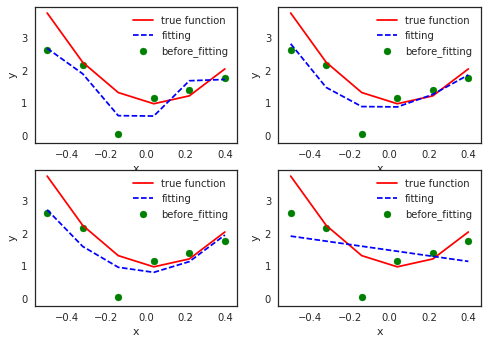

In [56]:

import numpy as np
from matplotlib import pyplot as plt

fig,ax = plt.subplots(2, 2, sharey=False)
ax1 =ax[0,0]
ax2=ax[0,1]
ax3=ax[1,0]
ax4=ax[1,1]

def f(x):
    return 9*x**2-x+1

def f_fit(x,y_fit):
    a,b,c,d,e=y_fit.tolist()
    return a*x**4+b*x**3+c*x**2+d*x+e
y_fit=np.polyfit(x,y,4)
y_show=np.poly1d(y_fit)
print(y_show)
y1=f_fit(x,y_fit)

ax1.plot(x,f(x),'r',label='true function')
ax1.scatter(x,y,c='g',label='before_fitting')
ax1.plot(x,y1,'b--',label='fitting')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()


#x3

def f(x):
    return 9*x**2-x+1

def f_fit(x,y_fit):
    a,b,c,d=y_fit.tolist()
    return a*x**3+b*x**2+c*x+d
y_fit=np.polyfit(x,y,3)
y_show=np.poly1d(y_fit)
print(y_show)
y1=f_fit(x,y_fit)

ax2.plot(x,f(x),'r',label='true function')
ax2.scatter(x,y,c='g',label='before_fitting')
ax2.plot(x,y1,'b--',label='fitting')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()


def f(x):
    return 9*x**2-x+1
def f_fit(x,y_fit):
    a,b,c=y_fit.tolist()
    return a*x**2+b*x+c
y_fit=np.polyfit(x,y,2)
y_show=np.poly1d(y_fit)
print(y_show)
y1=f_fit(x,y_fit)
ax3.plot(x,f(x),'r',label='true function')
ax3.scatter(x,y,c='g',label='before_fitting')
ax3.plot(x,y1,'b--',label='fitting')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.legend()


def f(x):
    return 9*x**2-x+1
def f_fit(x,y_fit):
    a,b=y_fit.tolist()
    return a*x+b
y_fit=np.polyfit(x,y,1)
y_show=np.poly1d(y_fit)
print(y_show)
y1=f_fit(x,y_fit)
ax4.plot(x,f(x),'r',label='true function')
ax4.scatter(x,y,c='g',label='before_fitting')
ax4.plot(x,y1,'b--',label='fitting')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.legend()
plt.show()

my observation: adding high degree polynomials sometimes can make the curve fit the given data better. However, thet can also cause the result to be overfitting.

### Problem 3 - Intro to Normalization (20 points)

This final problem is a brief exercise to explore the effects of normalization. We will be using household data from California, which was derived from the 1990 census. (https://www.kaggle.com/camnugent/california-housing-prices)

In [451]:
housing = pd.read_csv('housing.csv')
housing = housing[['median_income', 'median_house_value']][0:50]
housing.head()

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0


**3.1)** Are there any immediately obvious trends between our two variables? Sort the values by *median_house_value*, then plot the data. Write a brief description of what you see (or, more likely, what you don't see, and why that might be the case). **(10 points)**

In [452]:
housing = housing.sort_values(by=['median_house_value'], ascending=[True])
housing.head(20)

,median_income,median_house_value
26,2.4597,93800.0
35,1.4861,97200.0
23,2.1806,99700.0
37,1.4103,103900.0
36,1.0972,104500.0
33,1.3750,104900.0
27,1.8080,105500.0
25,2.4038,107500.0
28,1.6424,108900.0
34,2.7303,109700.0


**Summary:to be honest I expected to see the median house value go up as median income goes up but I didn't see it'**

**3.2)** Orthonormalize the data so that the *mean* is 0 and the *st_dev* is 1. Write this as a python function that can be fed a dataframe and return an orthonormalized version (this should take no more than 4 lines of code). Plot an orthonormalized version of the housing data that you now have. Write a brief description of how it looks different than in *3.1* and ellaborate breifly on why and in what situations orthonormalization can be useful. **(10 points)**

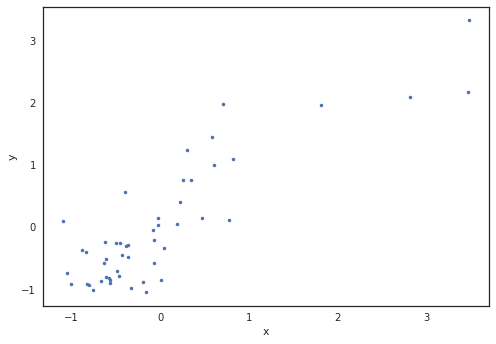

In [453]:
import sklearn
from sklearn import preprocessing
from matplotlib import pyplot as plt
dfx= preprocessing.scale(housing.median_income)
dfy=preprocessing.scale(housing.median_house_value)
plt.plot(dfx,dfy,'.')
plt.xlabel('x')
plt.ylabel('y')

Summary:from this plot we can notice that when median income and median house value are relatively low, there is not a significant relationship between them. However, when they both grow larger, ther are positively related. This plot helps us to find this pattern easily in situations where the data set is large and the relationship between different variables varies in different zones.